## <span style="color:blue">  Numerical exercises 1</span>
### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:
1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

In [1]:
##run this cell to use the notebook

##it imports the modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss
from scipy.stats import norm
from scipy.optimize import curve_fit
import numpy as np
import math


#and defines important methods

def f2plot(file,cat,pts):
    #this function takes a file and turns it into a
    #given matrix for plotting reasons
    table=np.zeros([cat,pts])
    lines=file.readlines()
    c=0
    for line in lines:
        line = line.replace("\n","")
        data = line.split(',')
        for i in range(len(data)):
            table[i][c] = float(data[i])
        c += 1
    file.close()
    return table
def cauchy(x,gamma,mu):
    y = (1./math.pi)*(gamma/(gamma**2 + (x-mu)**2))
    return y

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

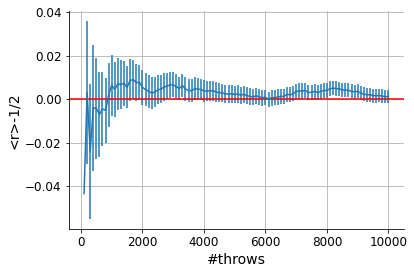

In [2]:
N=100
M=10000
L=int(M/N)
f=open("resout.dat","r")
data=f2plot(f,2,N)
X= ((np.arange(N))+1)*L

#let's plot!
plt.errorbar(X,(data[0]-0.5),yerr=data[1])
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> 

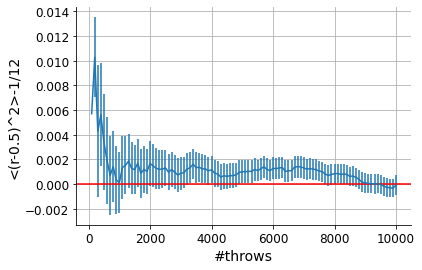

In [3]:
N=100
M=10000
L=int(M/N)

f=open("resout2.dat","r")
data=f2plot(f,2,N)
X= ((np.arange(N))+1)*L

#let's plot!
plt.errorbar(X,(data[0]-1/12),yerr=data[1])
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

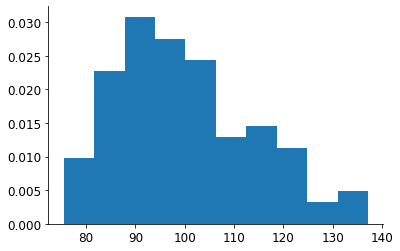

In [4]:
f=open("resout3.dat","r")

data=f2plot(f,1,100)
plt.hist(data[0],density=True)
plt.show()

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:
1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

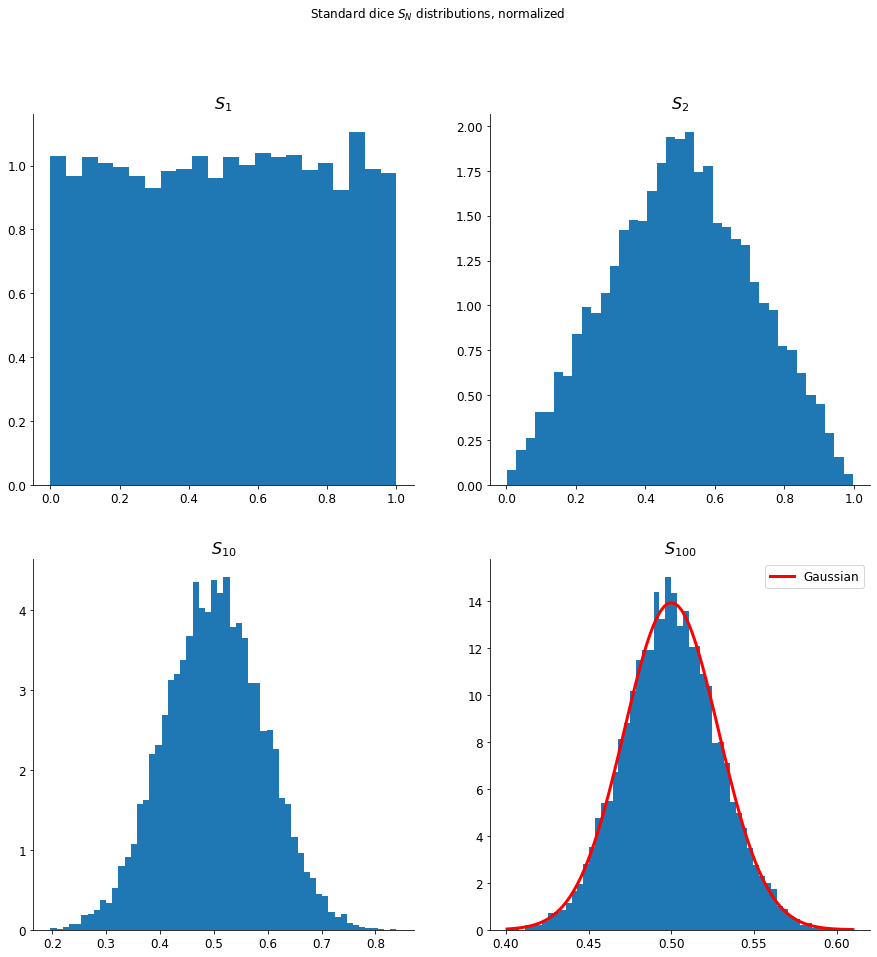

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Standard dice $S_N$ distributions, normalized')


#stand1
f=open("stand1.dat","r")
data=f2plot(f,1,10000)
ax[0,0].set_title("$S_1$")
ax[0,0].hist(data[0],density=True, bins='auto')

#stand2
f=open("stand2.dat","r")
data=f2plot(f,1,10000)
ax[0,1].set_title("$S_2$")
ax[0,1].hist(data[0],density=True, bins='auto')

#stand10
f=open("stand10.dat","r")
data=f2plot(f,1,10000)
ax[1,0].set_title("$S_{10}$")
ax[1,0].hist(data[0],density=True, bins='auto')

#stand100
f=open("stand100.dat","r")
data=f2plot(f,1,10000)

# parameters of the gaussian curve
mean = np.mean(data[0])
variance = np.var(data[0])
sigma = np.sqrt(variance)

ax[1,1].set_title("$S_{100}$")
ax[1,1].hist(data[0],density=True, bins='auto')
x = np.linspace(min(data[0]), max(data[0]), 100)
ax[1,1].plot(x, norm.pdf(x, mean, sigma),linewidth=3, c="red", label="Gaussian")
ax[1,1].legend()


plt.show()

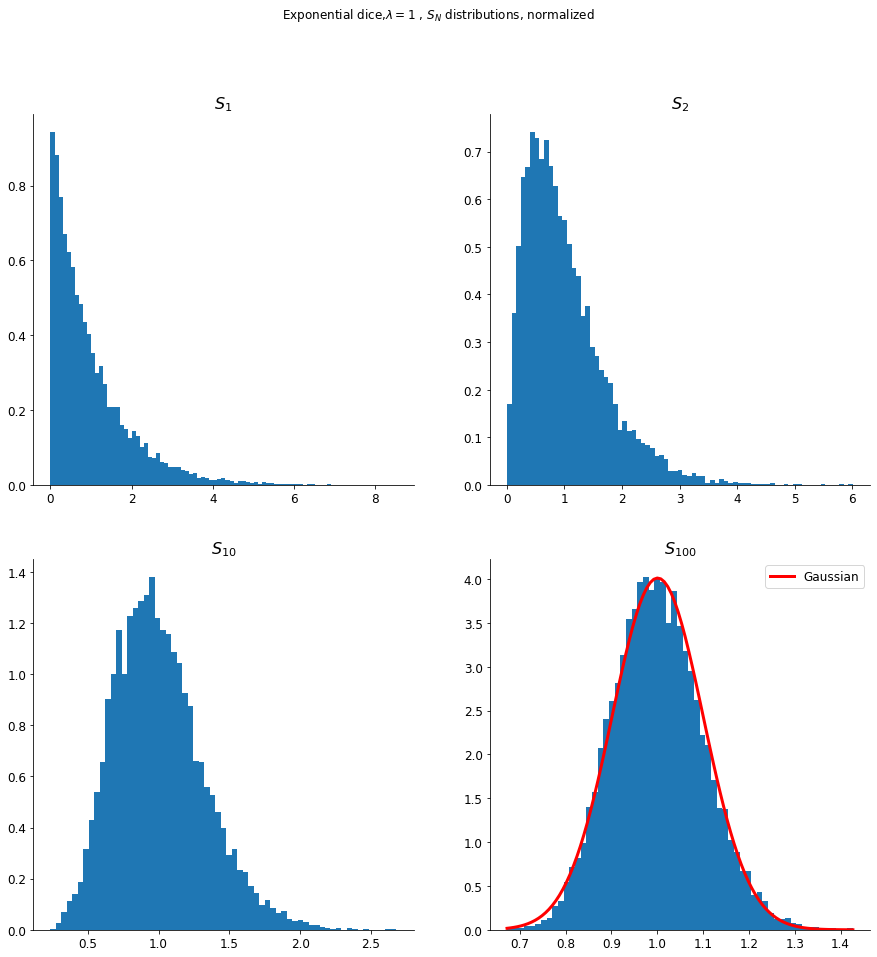

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Exponential dice,$\lambda = 1$ , $S_N$ distributions, normalized')

#expo1
f=open("expo1.dat","r")
data=f2plot(f,1,10000)
ax[0,0].set_title("$S_1$")
ax[0,0].hist(data[0],density=True, bins='auto')

#expo2
f=open("expo2.dat","r")
data=f2plot(f,1,10000)
ax[0,1].set_title("$S_2$")
ax[0,1].hist(data[0],density=True, bins='auto')

#expo10
f=open("expo10.dat","r")
data=f2plot(f,1,10000)
ax[1,0].set_title("$S_{10}$")
ax[1,0].hist(data[0],density=True, bins='auto')

#expo100
f=open("expo100.dat","r")
data=f2plot(f,1,10000)

# parameters of the gaussian curve
mean = np.mean(data[0])
variance = np.var(data[0])
sigma = np.sqrt(variance)

ax[1,1].set_title("$S_{100}$")
ax[1,1].hist(data[0],density=True, bins='auto')
x = np.linspace(min(data[0]), max(data[0]), 100)
ax[1,1].plot(x, norm.pdf(x, mean, sigma),linewidth=3, c="red", label="Gaussian")
ax[1,1].legend()







plt.show()

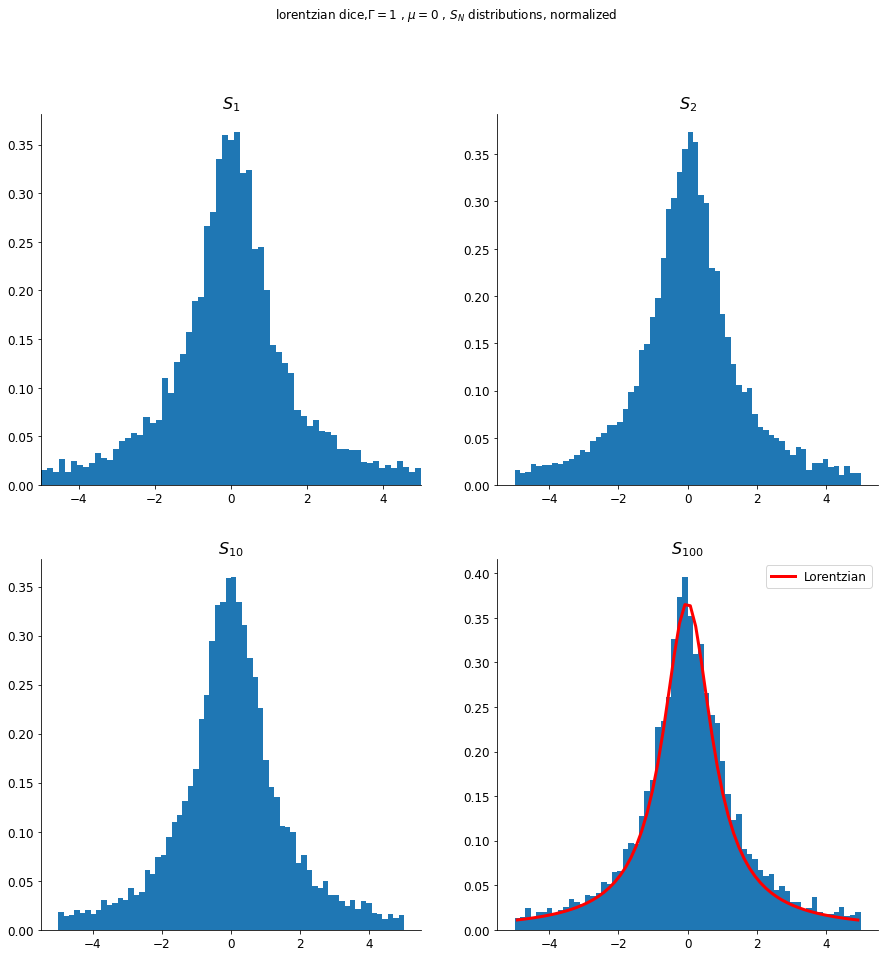

In [7]:


fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('lorentzian dice,$\Gamma = 1$ , $\mu = 0$ , $S_N$ distributions, normalized')

#lorentz1
f=open("lorentz1.dat","r")
data=f2plot(f,1,10000)
ax[0,0].set_title("$S_1$")
ax[0,0].hist(data[0], density=True,bins='auto',range=[-5.,5.])
ax[0,0].set_xlim(-5,5.)

#lorentz2
f=open("lorentz2.dat","r")
data=f2plot(f,1,10000)
ax[0,1].set_title("$S_2$")
ax[0,1].hist(data[0], density=True, bins='auto',range=[-5.,5.])
ax[0,0].set_xlim(-5,5.)

#lorentz10
f=open("lorentz10.dat","r")
data=f2plot(f,1,10000)
ax[1,0].set_title("$S_{10}$")
ax[1,0].hist(data[0], density=True, bins='auto',range=[-5.,5.])
ax[0,0].set_xlim(-5,5.)
#lorentz100
f=open("lorentz100.dat","r")
data=f2plot(f,1,10000)

# parameters of the gaussian curve
mean = np.mean(data[0])
variance = np.var(data[0])
sigma = np.sqrt(variance)

ax[1,1].set_title("$S_{100}$")

#ax[1,1].hist(data[0], density=True, bins='auto',range=[-5.,5.])
counts, bins, bars = plt.hist(data[0], density=True, bins='auto',range=[-5.,5.])

bins += np.diff(bins)[0]/2.
bins= np.delete(bins,len(bins)-1)

gamma, mu = scipy.optimize.curve_fit(cauchy, bins, counts)[0]
ax[1,1].plot(bins,cauchy(bins,gamma,mu),linewidth=3, c='red',label='Lorentzian')

ax[1,1].legend()

plt.show()




### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

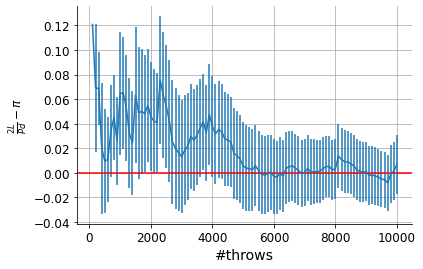

In [8]:
N=100
M=10000
L=int(M/N)

f=open("buffon.dat","r")
data=f2plot(f,2,N)
X= ((np.arange(N))+1)*L

#let's plot!
plt.errorbar(X,(data[0]-math.pi),yerr=data[1])
plt.xlabel('#throws')
plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.ylabel(r'$\frac{2L}{Pd} - \pi $',fontsize='large', fontweight='bold')
plt.grid(True)
plt.show()

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?

Our numbers are generated by a deterministic algorithm. No matter how hard one try, the next number will be dependent on the numbers before it and somehow correlated. We can solve it by using blocks large enough that the numbers in each block lose correlation to those of the adjacent blocks.